In [1]:
from os import listdir, makedirs
from os.path import isfile, isdir, join
import cv2, copy, json, os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import PIL
import zipfile

In [2]:
from img_aug_refined import *

testing images


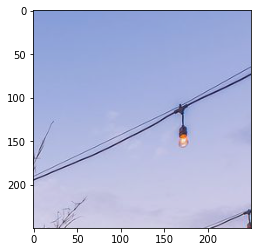

In [6]:
# cropping 할 배경 이미지 (aug) 리스트 
dir1 = './background-images/'
imdirs = os.listdir(dir1)
imlist = [ plt.imread(dir1 + i) for i in imdirs ]

###Quick Check ###
random_indx = np.random.randint(low = 0,high = 4, size = len(imlist))
print('testing images')
plt.imshow(rand_crop_img(imlist[random_indx[0]]))

In [7]:
os.chdir('../CV_DeepLearning')
os.getcwd()
# 'C:\\Users\\NormalKim\\[0_ACU_FINAL_0830]\\CV_DeepLearning'

'C:\\Users\\NormalKim\\[0_ACU_FINAL_0830]\\CV_DeepLearning'

json_key:  sobu_0000256_rt-9_rotated_filled


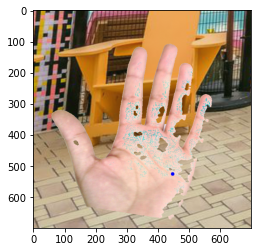

In [29]:
kw = 'sobu'
#augmented = ''
augmented = '/rotated_filled'
folder_path = f'../CV_DeepLearning/Acu_Dataset/{kw}' + augmented 

# open json data
folder_ = os.listdir(folder_path)
bool_ind = ['.json' in k for k in folder_]
json_file_name = np.array(folder_)[bool_ind][0]
json_file_path = os.path.join(folder_path, json_file_name )
json_data = open_json_file(json_file_path)
json_list = list(json_data) 

# indexing json data 
json_index = 100

json_key = json_list[json_index] 
print('json_key: ', json_key ) 
x,y = json_data[json_key][1]['acup_coord']

# get im directory 
if augmented == '':
    json_key = json_key.replace('sobu', 'Hand')
    im_path = os.path.join(folder_path + augmented, 'org', json_key+ '.png')
else:
    im_path = os.path.join(folder_path + augmented, json_key+ '.png')
img = Image.open(im_path)

# try_out
plt.imshow(create_circle_patch(img, x, y, color = 'blue', r = 5))